## Tracking pipeline <br>
This notebook will guide you through steps required to track honeybees, from detection to trajectory construction. The pipeline contains two neural networks, one for object detection and one for building embeddings of visual features of detections that is used in trajectory construction. With this code we provide pretrained networks, that however might not work perfect for your specific imaging data. For this purpose we include in the pipeline __retraining procedures__ that allow to validate and correct the results you obtain and retrain the networks of the corrected data. Such retraining, with only small burden of manual work, should dramatically improve model performance on the specific data you are working on. <BR>
 
With this pipeline we provide sample data that this notebook can be deployed on. To make it work on your data, arrange it in the same way as the provided data, or adjust the data handling code. 

### Requirements
* Python 3.5+
* [TensorFlow](https://www.tensorflow.org/) (1 or higher)
* [Numpy](http://www.numpy.org/)
* [Pillow](https://pillow.readthedocs.io/en/stable/)
* [matplotlib](https://matplotlib.org/)
* [scikit-learn](https://scikit-learn.org/stable/)


We recommend running this code in a virtual environment (e.g. `venv` or `conda`) as installing tensorflow in global enviroment can change links to libraries used by other applications in the system. For ease we also provide `requirements.txt` file. You can install all the necessary packages by running **in your virtual environment:** `pip install -r requirements.txt`.

First we will download and unpack sample data for this notebook (depending on your connection this might take a moment):

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import urllib.request, tarfile, os
from utils.func import DownloadProgress

fname = "data.tgz"
progress = DownloadProgress()
urllib.request.urlretrieve("https://beepositions.unit.oist.jp/" + fname, fname, reporthook=progress.progress_hook)

with tarfile.open(fname, "r:gz") as tar:
    tar.extractall()

os.remove(fname)

downloading.. 3%.. 6%.. 9%.. 12%.. 15%.. 18%.. 21%.. 24%.. 27%.. 30%.. 33%.. 36%.. 39%.. 42%.. 45%.. 48%.. 51%.. 54%.. 57%.. 60%.. 63%.. 66%.. 69%.. 72%.. 75%.. 78%.. 81%.. 84%.. 87%.. 90%.. 93%.. 96%.. 99%.. done!


The structure of the data folder is:<br>
```
data
+-- checkpoints  
|   +-- inception
|       +-- model_005000.ckpt.*
|   +-- unet2
|       +-- model_001000.ckpt.*
+-- frames  
|   +-- *.png
```
`frames` folder contains following in time frames from a video of a beehive. If you want to use your data extract the following frames of a video recording into this folder and name them with a `"%06d.png` format.<br>

<a id='find_det'></a>
### Detection inference
We will now run the detection procedure on the video frames:

In [1]:
import detection.find_det as fd

fd.find_detections()

data
101 files
Restoring checkpoint 1000..
Converting TF1 checkpoint to Keras format...
Saved converted weights to data/checkpoints/unet2/model_001000.weights.h5


Processing: 100%|██████████| 101/101 [02:19<00:00,  1.38s/patches, frame=101/101, run=1/1, bees=2]


Processing complete!
Total time: 2.3 minutes
Total bees detected: 388
Average processing time per frame: 1.4 seconds
Detection files created: 101


`detection` subfolder of the data folder contains now detections of bees in the respective frames, with text format `x,y,class,angle` for each detection. <br>
We will plot detections to inspect their accuracy. We can plot individual frames:

/var/folders/07/cxyxmklj1q52sd3v6djdkh640000gn/T/ipykernel_2548/760013246.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


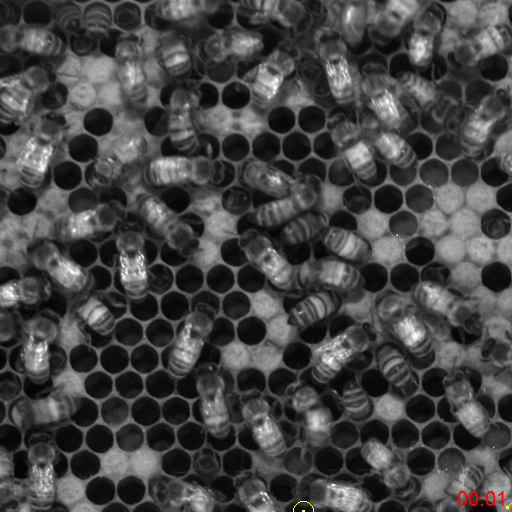

In [14]:
from IPython.core.display import Image, display
from importlib import reload
from plots import plot
fr = 10

reload(plot)

display(plot.plot_detections(fr, save=False))

There is 100 frames in this sample dataset, we can merge them into an animation. For convenience instead of vidoes we will generate animated gif files. The files will be stored in the data folder and displayed here below. The animation is played in a repeated loop.<br>
To generate the animation:

/Users/danielwilcox/Documents/bee-dance-tracker/bee_tracking/plots/plot.py:210: UserWarning: loadtxt: input contained no data: "data/detections/000000.txt"
  all_bees = np.loadtxt(os.path.join(POS_DIR, "%06d.txt" % fr), delimiter=',').astype(int)


frame 0 has 0 bees
frame 1 has 3 bees
bee 0 at 196, 250
bee 1 at 234, 259
bee 2 at 51, 403
frame 2 has 3 bees
bee 0 at 198, 251
bee 1 at 87, 255
bee 2 at 234, 259
frame 3 has 5 bees
bee 0 at 234, 259
bee 1 at 332, 51
bee 2 at 420, 279
bee 3 at 507, 506
bee 4 at 309, 511
frame 4 has 5 bees
bee 0 at 17, 154
bee 1 at 234, 259
bee 2 at 417, 284
bee 3 at 507, 506
bee 4 at 467, 511
frame 5 has 4 bees
bee 0 at 104, 255
bee 1 at 234, 259
bee 2 at 507, 506
bee 3 at 309, 511
frame 6 has 5 bees
bee 0 at 77, 76
bee 1 at 93, 255
bee 2 at 234, 259
bee 3 at 261, 422
bee 4 at 507, 506
frame 7 has 5 bees
bee 0 at 21, 139
bee 1 at 13, 153
bee 2 at 234, 259
bee 3 at 331, 54
bee 4 at 507, 506
frame 8 has 6 bees
bee 0 at 17, 139
bee 1 at 14, 152
bee 2 at 62, 258
bee 3 at 132, 264
bee 4 at 234, 259
bee 5 at 507, 506
frame 9 has 3 bees
bee 0 at 16, 147
bee 1 at 234, 259
bee 2 at 507, 507
frame 10 has 2 bees
bee 0 at 507, 507
bee 1 at 303, 511
frame 11 has 5 bees
bee 0 at 14, 147
bee 1 at 84, 254
bee 2 at 187

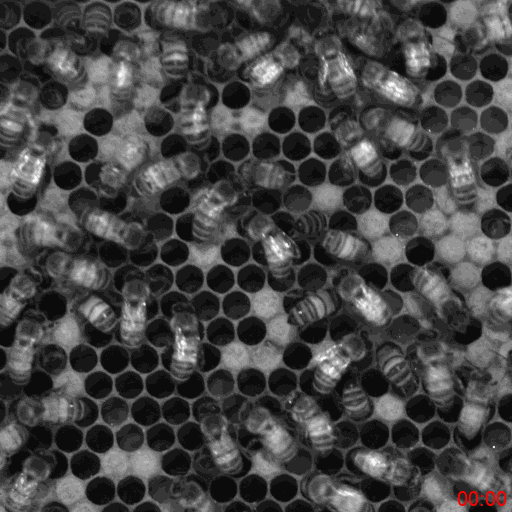

In [24]:
from utils import paths
import os
from plots import plot

plot.plot_detection_video()
display(Image(os.path.join(paths.PLOTS_DIR, "detections.gif")))

If the results look good proceed to the [tracking step](#track_start).

### Detection retraining
Otherwise if you consider that the results look imprecise, or there are too many false positives you can perform network retraining described here. To improve these results, use [this tool](https://github.com/oist/DenseObjectAnnotation) to correct the prediction. Download the code, follow installation instructions, then copy the `data/frames/*.png` files to the `DenseObjectAnnotation/static/png` folder of the and `data/detections/*.txt` to `DenseObjectAnnotation/static/txt` folder. To adjust the tool to the provided dataset, change the `ZOOM_LEVEL = 1.0;` parameter in the `static/annotate.js` file. If you are working with images of another size, adjust the zoom level accordingly.<br>
Correct a range of frames in consecutive order, for example frames 0, 1, 2, .. 10. After correcting, create a training set from the corrected frames with the function `create_from_frames` taking as input: the range of corrected frames, location of the annotation results, and location of the corresponging images.

In [ ]:
from detection import dataset

static_dir = "../DenseObjectAnnotation/static"
dataset.create_from_frames(range(10), os.path.join(static_dir, "png"), os.path.join(static_dir, "txt"))

To plot and display sample segmentation labels:

In [ ]:
from plots import segm_map

frame_nb = 5

class_map = segm_map.plot_segm_map(frame_nb)
display(class_map)

In [ ]:
angle_map = segm_map.plot_angle_map(frame_nb)

display(angle_map)

We will now train the detection network on the range of corrected images. The training function uses all `*.npz` files from the data folder given as parameter. A default location of this folder is set as the default output of the `dataset.create_from_frames` function used above. Input parameter `train_prop` defines what proportion of the input should be used as training (by default 0.9), remaining frames will be used to estimate test error.<br>

During training the function iterates over the input files and randomly samples window of a size `256x256 pixel` and randomly flips the input along x- and y-axes.
The last existing checkpoint of this network will be read in from the `checkpoint/unet2` folder of the data folder. The function will repeat the training `n_iters` times (by default 10). Depending on your computational power and patience, you can set this parameter to a higher number. 
Additionally if you want to speed up convergence and are interested only in a small dataset, set  `with_augmentation=False`.

In [ ]:
from detection import train_detection

model, imgs, iter_nb = train_detection.run_training(return_img=True, with_augmentation=False)

<a id='display_img'></a>
The output of the training function contains images of the segmentation results from the last test step. The `imgs` variable is a list of pairs: `[(classification_image, angle_image), ..]` of the size of the training batch. You can disply them to inspect the quality of segmentation:

In [ ]:
batch_i = 2 # batch size by default = 4, you can change this variable from 0..batch_size - 1
display(imgs[batch_i][0])
display(imgs[batch_i][1])

You might consider that the results are not good enough, in that case use the `model` object to continue trainining using `run_training_on_model` function for `n_iter` times. After the function is finished go back to the [step above](#display_img) to inspect the results again.

In [ ]:
model, imgs, iter_nb = train_detection.run_training_on_model(model, iter_nb, n_iters=10, return_img=True)

Each training run logs the loss and error values in the `accuracy.csv` file located in the checkpoint folder. We can plot those values change during training:

In [ ]:
from utils import paths
import numpy as np
import matplotlib.pyplot as plt

acc = np.loadtxt(os.path.join(paths.CHECKPOINT_DIR, "unet2", "accuracy.csv"), delimiter=',')
train_acc = acc[acc[:,0]==0,:]
test_acc = acc[acc[:,0]==1,:]

params = { 1:"Loss", 2:"Background overlap", 3:"Foreground overlap", 4: "Class error", 5: "Angle error"}
param = 1
_ = plt.plot(range(train_acc.shape[0]), train_acc[:,param], color='b', label="train")
_ = plt.plot(range(test_acc.shape[0]), test_acc[:,param], color='r', label='test')
_ = plt.title(params[param])
_ = plt.xlabel("Iteration")
_ = plt.legend()

After training delete the model to free the memory:

In [ ]:
del model

Now go back to the detection [inference step](#find_det) to infer the detections again.

<a id='track_start'></a>
### Tracking
In the trajectory construction procedure we exploit not only position and postural information that is included in the `detections` folder, but also numeric *embeddings* encoding visual aspects of each individual bee. The embeddings are derived from a pretrained neural network.<br>

You can build the embeddings with the `build_embeddings` function in the `embed` module. This function reads in the image and detection data, crops the detections from the images and feeds them into the network. The output of the network is then saved in text and binary files in the `detections_embeddings` subfolder of the data folder.<br>
To run the procedure:

In [ ]:
from tracking import embed

embed.build_embeddings()

In the created files the position and posture information `x,y,class,angle` of each detection is concatenated with another 64 numbers forming the embedding of the detection visual features:

In [ ]:
import numpy as np

fr = 10
det = np.load(os.path.join(paths.FTS_DIR, "%06d.npy" % fr))
print("frame %i - detections: %i, embedding size: %i" % (fr, det.shape[0], det.shape[1]-4))

Using the embeddings we will now perform trajectory construction procedure. The logic and parameters of this procedure are described in our manuscript and included in the `track` module. We will first perform the matching `build_trajectories()`, then sort them according to their length `sort_trajectories`:

In [ ]:
from tracking import track

track.build_trajectories()
track.sort_trajectories()

Generated trajectories are located in the `trajectories` subfolder of the data folder. In addition to trajectory files, file `tra_lens.txt` lists starting point and length of each trajectory. Using this file can easily inspect the lengths of the generated trajectories:

In [ ]:
import matplotlib.pyplot as plt

tra_lens = np.loadtxt(os.path.join(paths.TRACK_DIR, "tra_lens.txt"), delimiter=",", dtype=np.int)
_ = plt.hist(tra_lens[:,1], bins=50)
_ = plt.xlabel('Trajectory lengths')

To quantify the accuracy of tracking you need to build a set of `reference trajectories`. [Code below](#emb_retrain) will help you to inspect and validate the trajectories. Once you collect a set of reference trajectories you can calculate how many of them are reproduced via the tracking procedure above:

In [ ]:
from tracking import reference_trajectory

ov = reference_trajectory.calculate_overlap()
print("%i reference trajectories covered, %.3f overlap on average" % (np.sum(ov[:,2] > 0), np.mean(ov[(ov[:,2]>0),2])))

<a id='emb_retrain'></a>
### Visual feature retraining
Now we can generate animations of individual trajectories. Similar to inproving detection accuracy, we can validate generated trajectories as use them to retrain the model. We will create a repository of the validated trajectories with the function `add_ref_trajectories`.

In [ ]:
from IPython.core.display import Image, display
from plots import plot

trajectory_nb = 34  # change this number to plot any other generated trajectory
trajectory_filename = plot.plot_trajectory(trajectory_nb)
display(Image(trajectory_filename))

If this trajectory is correct add it to the set of validated trajectories, then repeat the plotting and validation for more trajectories.

In [ ]:
reference_trajectory.add_ref_trajectories([trajectory_nb])

Once you gathered a large number of validated trajectories, this information can be used to retrain the visual feature quantification model:

In [ ]:
from tracking import train_embedding

train_embedding.run_train()

There is by default 12 triplets in 1 batch and each 10 batches form an epoch. On a small set of reference trajectories, the error might be small and you won't see big change during training. Training results are logged in the `accuracy.csv` file located in the checkpoint folder and contains loss value and mean values of the Euclidean distance between pairs of images belonging to the same bee (positive distance) and pairs of images belonging to different bees (negative distance). We can plot these logs:

In [ ]:
acc = np.loadtxt(os.path.join(paths.CHECKPOINT_DIR, "inception", "accuracy.csv"), delimiter=',')

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
_ = plt.plot(range(acc.shape[0]), acc[:,0], color='black', label="loss")
_ = plt.xlabel("Iteration")
_ = plt.ylabel("Loss")
plt.subplot(1, 2, 2)
_ = plt.plot(range(acc.shape[0]), acc[:,1], color='blue', label="positive")
_ = plt.plot(range(acc.shape[0]), acc[:,2], color='red', label="negative")
_ = plt.xlabel("Iteration")
_ = plt.ylabel("Euclidean distance")
_ = plt.legend()

You can go back to the [tracking step](#track_start) to see if the results look better.

Finally, we can generate a video of all trajectories:

In [ ]:
all_trajectories_filename = plot.plot_all_trajectories()
display(Image(all_trajectories_filename))